In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [179]:
train=pd.read_csv('titanic_train.csv')

In [180]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


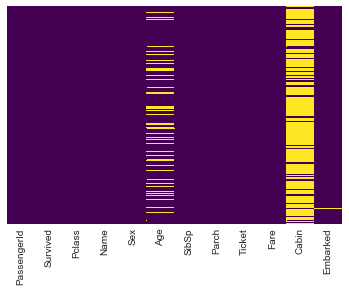

In [181]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [182]:
sns.set_style('whitegrid')

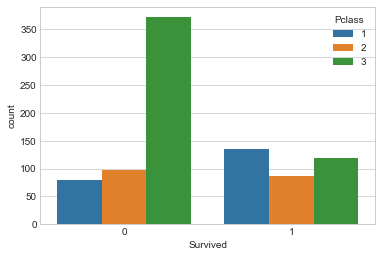

In [183]:
sns.countplot(x='Survived',hue='Pclass',  data=train)

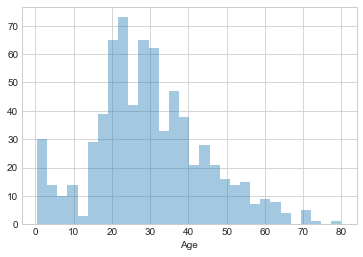

In [184]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

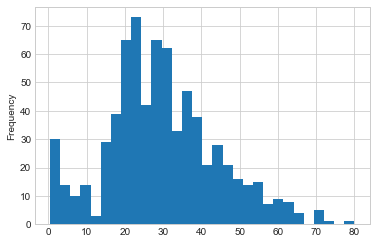

In [185]:
train['Age'].plot.hist(bins=30)

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


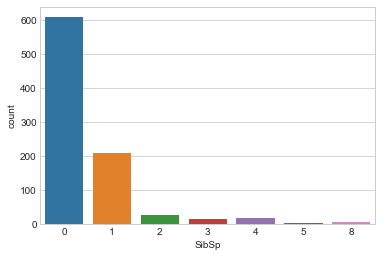

In [187]:
sns.countplot(x='SibSp', data=train)

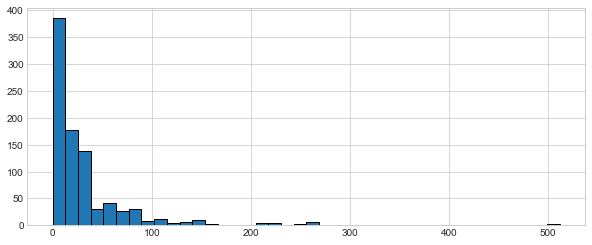

In [188]:
train['Fare'].hist(bins=40, figsize=(10,4), edgecolor='black')

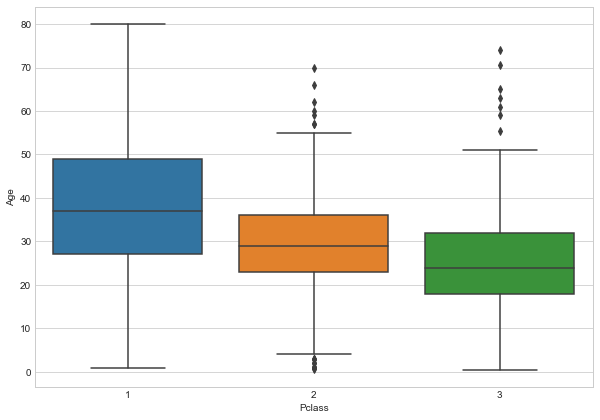

In [189]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [190]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else :
            return 24
    
    else:
        return Age

In [191]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age,axis=1)

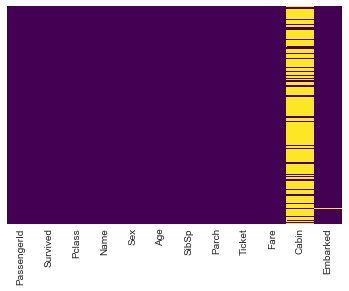

In [192]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [193]:
train.drop('Cabin', axis=1, inplace=True)

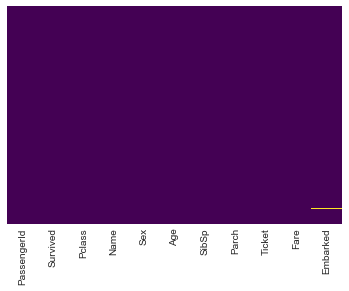

In [194]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [195]:
train.dropna(inplace=True)

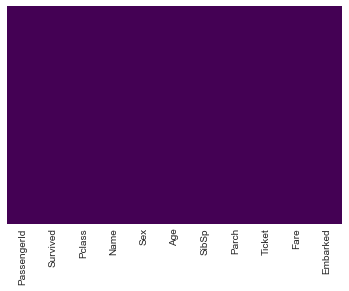

In [196]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [197]:
sex=pd.get_dummies(data=train['Sex'], drop_first=True)

In [198]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [201]:
embark=pd.get_dummies(data=train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [200]:
train=pd.concat( [train, sex, embark], axis=1 )
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [202]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [205]:
train.drop('PassengerId', axis=1, inplace=True)

In [206]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [211]:
X=train.drop('Survived', axis=1)
y=train['Survived']

In [212]:
from sklearn.cross_validation import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [215]:
from sklearn.linear_model import LogisticRegression

In [217]:
logModel=LogisticRegression()

In [219]:
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [220]:
 predictions=logModel.predict(X_test)

In [222]:
from sklearn.metrics import classification_report

In [226]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [227]:
from sklearn.metrics import confusion_matrix

In [228]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [229]:
logModel.coef_

array([[-0.78495489, -0.0258638 , -0.2165002 , -0.08529262,  0.00468566,
        -2.32107225, -0.01528123, -0.16977451]])